In [11]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Jupyter settings
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [12]:
# Reading Data

df = pd.read_csv("../data/credit_card_data.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [13]:
# Initial Exploration

print("Shape:", df.shape)
print()
df.info()
print()
df.describe().T

Shape: (8950, 18)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


In [14]:
# Missing Value Check

df.isnull().sum().sort_values(ascending=False)

MINIMUM_PAYMENTS                    313
CREDIT_LIMIT                          1
BALANCE                               0
CUST_ID                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
PURCHASES_INSTALLMENTS_FREQUENCY      0
ONEOFF_PURCHASES_FREQUENCY            0
CASH_ADVANCE_TRX                      0
CASH_ADVANCE_FREQUENCY                0
PURCHASES_TRX                         0
PAYMENTS                              0
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [15]:
# Fill missing values with median

df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df['CREDIT_LIMIT'] = df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median())

In [16]:
# Drop Customer ID

df.drop('CUST_ID', axis=1, inplace=True)

In [17]:
# Feature Engineering

df['Total_Spend'] = df['PURCHASES'] + df['CASH_ADVANCE']
df['Payment_to_MinPay'] = df['PAYMENTS'] / (df['MINIMUM_PAYMENTS'] + 1e-5)
df['Balance_Limit_Ratio'] = df['BALANCE'] / (df['CREDIT_LIMIT'] + 1e-5)


In [18]:
# Feature Scaling

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

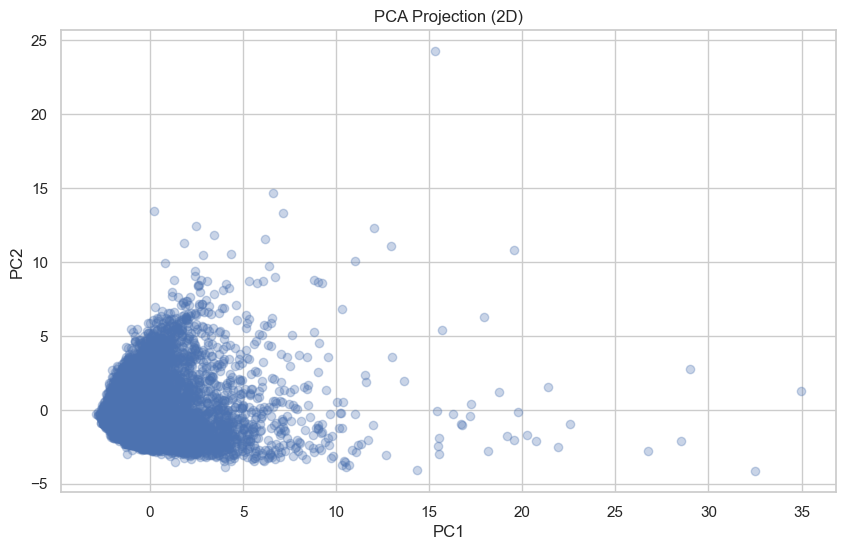

In [30]:
# Dimensionality Reduction

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.scatter(df_pca[:, 0], df_pca[:, 1], alpha=0.3)
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig('../images/PCA_scatter_plot.png')
plt.show()

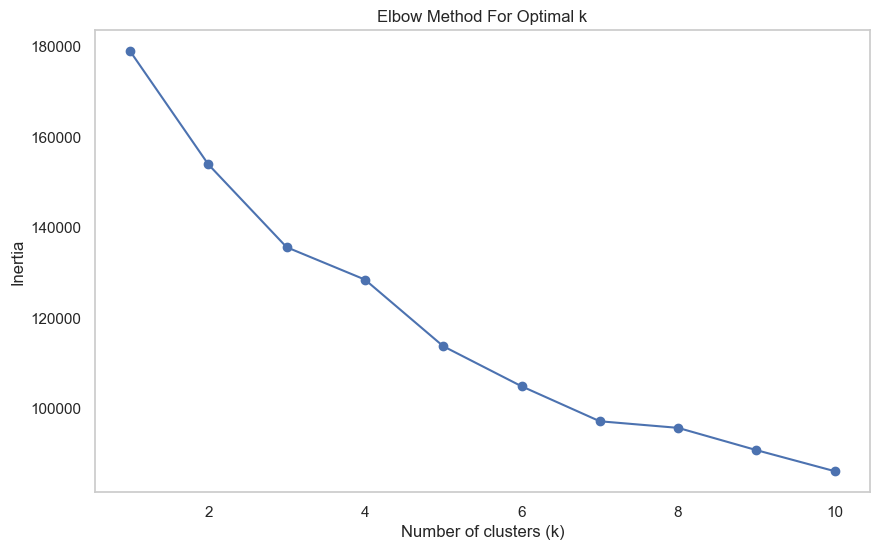

In [22]:
# Elbow Method for Optimal Clusters

inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.grid()
plt.savefig('../images/elbow_curve.png')
plt.show()

In [23]:
# Apply KMeans with chosen k
    
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
df['Cluster'] = kmeans.fit_predict(df_scaled)


In [33]:
# Cluster Profiling

df.groupby('Cluster').mean().T


Cluster,0,1,2,3
BALANCE,4072.351442,2017.042984,692.767644,2.095923
BALANCE_FREQUENCY,0.984352,0.864296,0.876722,0.293561
PURCHASES,6170.172799,254.263017,1071.351788,496.210000
ONEOFF_PURCHASES,4039.306536,199.930305,519.269369,0.000000
INSTALLMENTS_PURCHASES,2131.890154,54.476129,552.450124,496.210000
CASH_ADVANCE,2277.122565,1556.330288,145.825728,480.273063
PURCHASES_FREQUENCY,0.921542,0.155401,0.798604,0.555555
ONEOFF_PURCHASES_FREQUENCY,0.664818,0.087669,0.261874,0.000000
PURCHASES_INSTALLMENTS_FREQUENCY,0.766797,0.070177,0.631555,0.555555
CASH_ADVANCE_FREQUENCY,0.167169,0.224562,0.031200,0.034722


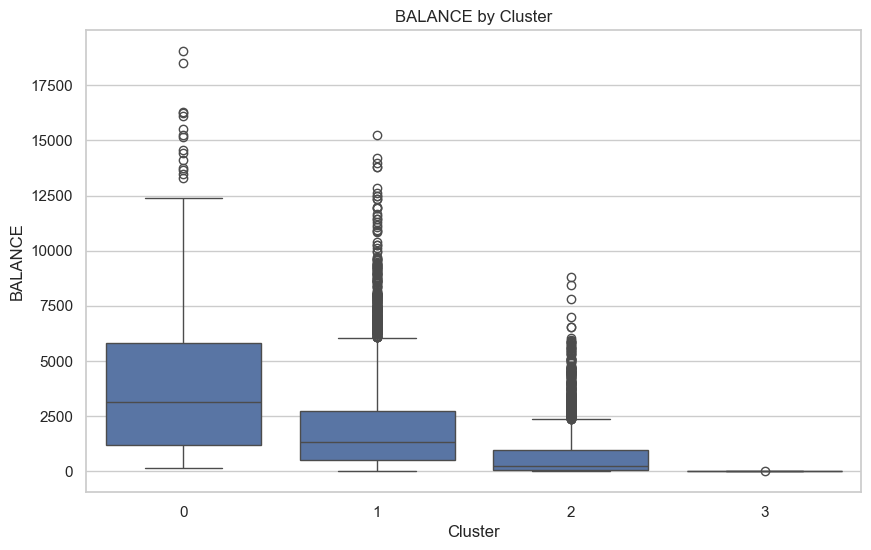

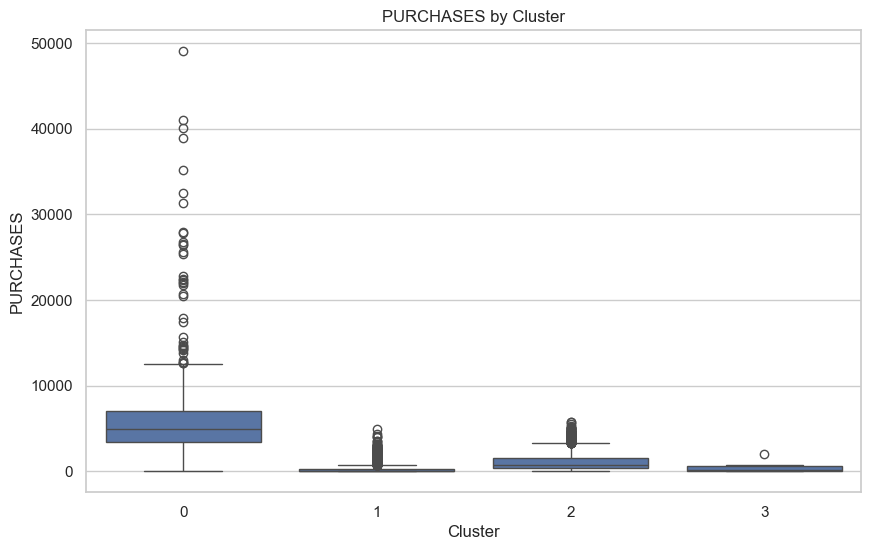

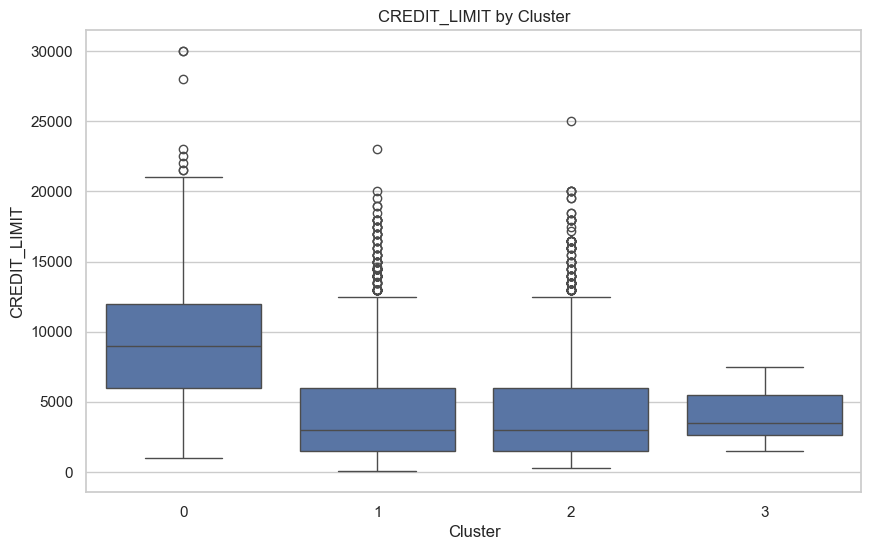

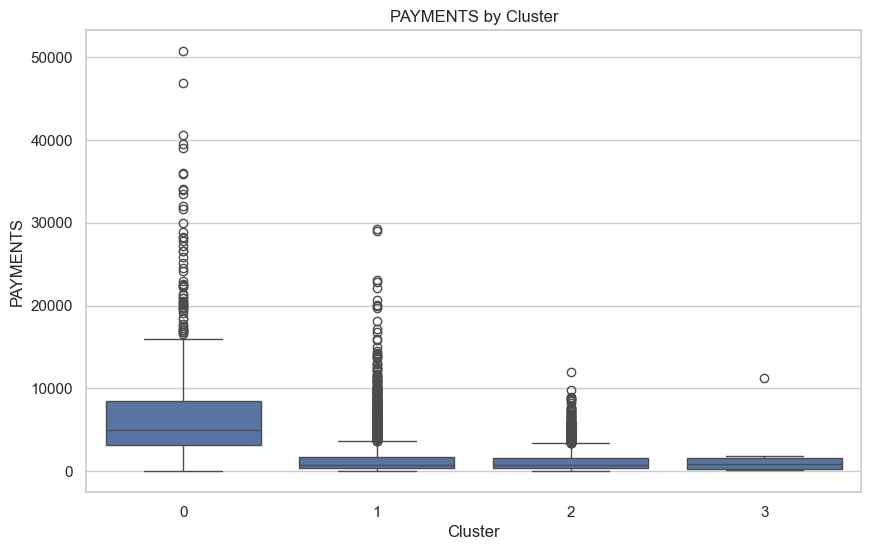

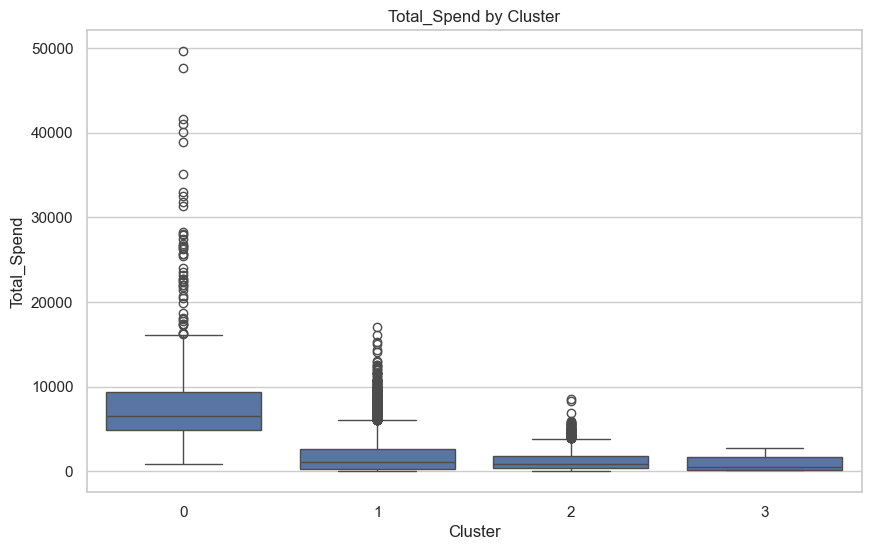

In [27]:
# Visualize Clusters by Feature

features = ['BALANCE', 'PURCHASES', 'CREDIT_LIMIT', 'PAYMENTS', 'Total_Spend']

for col in features:
    sns.boxplot(data=df, x='Cluster', y=col)
    plt.title(f'{col} by Cluster')
    plt.savefig(f"../images/{col}"+"_boxplot.png")
    plt.show()


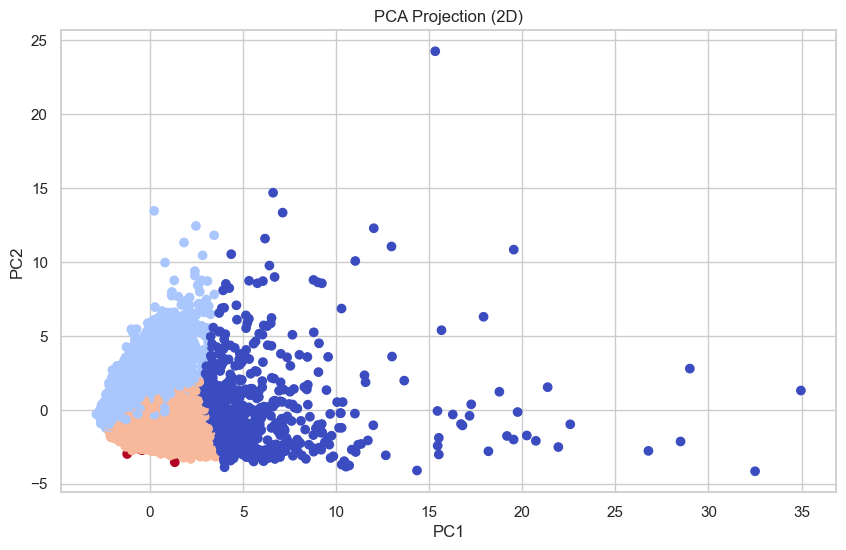

In [48]:
# Visualising clusters again with correspond cluster

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

plt.scatter(df_pca[:, 0], df_pca[:, 1], c=df['Cluster'], cmap="coolwarm")
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.savefig('../images/PCA_scatter_plot_clusters.png')
plt.show()

In [26]:
# Save Clustered Output

df.to_csv('../outputs/clustered_customers.csv', index=False)
